In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Load Data
data_train=pd.read_csv("../input/tweet-sentiment-extraction/train.csv")
data_test=pd.read_csv("../input/tweet-sentiment-extraction/test.csv")

In [36]:
data_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [37]:
data_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [38]:
#This is the text similarity technique used in this competition
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0):
        return 0.5
    c = a.intersection(b)

    return float(len(c)) / (len(a) + len(b) - len(c))

In [39]:
def mapOfsentiments(x):
    if x=='neutral':
        return 0
    elif x=='positive':
        return 1
    else:
        return -1

In [40]:
data_train['sentiment']=data_train['sentiment'].apply(lambda x: mapOfsentiments(x))
data_test['sentiment']=data_test['sentiment'].apply(lambda x: mapOfsentiments(x))


In [50]:
data_train['text_length']=data_train['text'].apply(lambda x: len(str(x).split(" ")))
data_test['text_length']=data_test['text'].apply(lambda x: len(str(x).split(" ")))

In [55]:
data_train['selected_text_length']=data_train['selected_text'].apply(lambda x: len(str(x).split(" ")))


In [85]:
data_train['jaccard_score']=data_train.apply(lambda x: jaccard(str(x['selected_text']),str(x['text'])),axis=1)


In [9]:
#Data Exploration

In [12]:
data_train.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

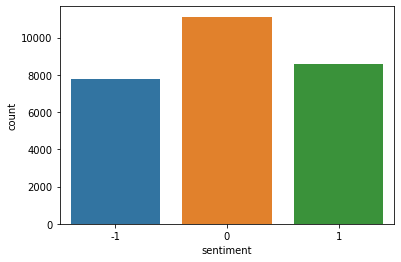

In [31]:
#Lets see how is the dataset (like is it balanced or unbalanced)
sns.countplot(x="sentiment", data=data_train)


<AxesSubplot:xlabel='sentiment', ylabel='count'>

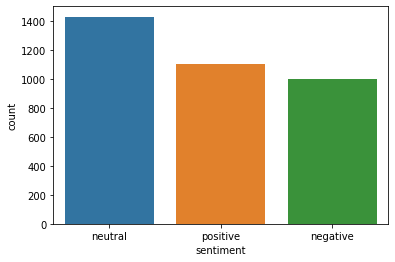

In [32]:
sns.countplot(x="sentiment", data=data_test)

<AxesSubplot:xlabel='sentiment', ylabel='text_length'>

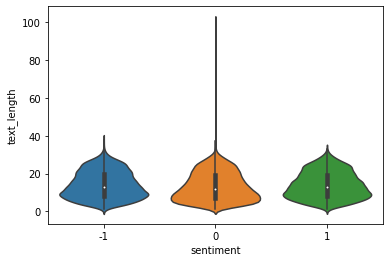

In [52]:
sns.violinplot(x="sentiment", y="text_length", data=data_train)

<AxesSubplot:xlabel='sentiment', ylabel='text_length'>

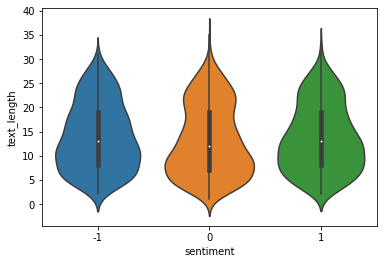

In [53]:
sns.violinplot(x="sentiment", y="text_length", data=data_test)

<AxesSubplot:xlabel='sentiment', ylabel='selected_text_length'>

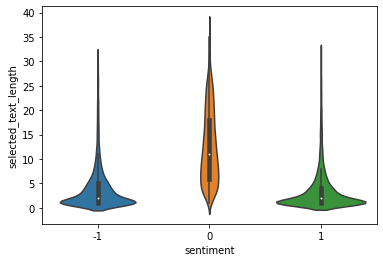

In [56]:
sns.violinplot(x="sentiment", y="selected_text_length", data=data_train)
#certainly a difference here w.r.t sentiment


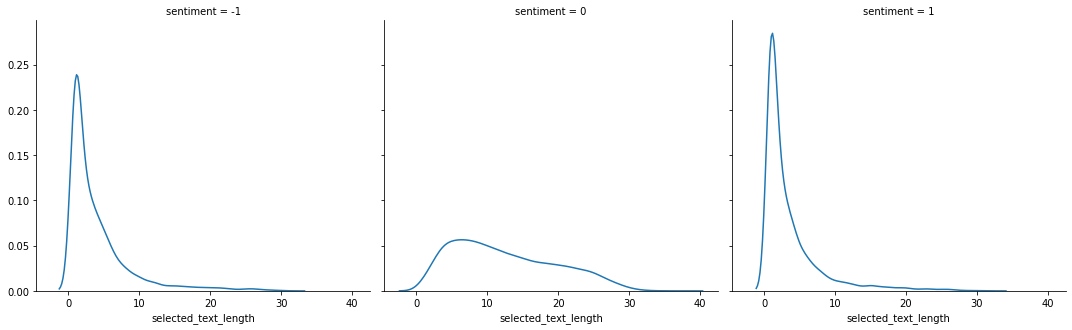

In [71]:

g=sns.FacetGrid(data=data_train,col='sentiment',height=5);
g.map(sns.kdeplot,'selected_text_length');
plt.subplots_adjust(top=0.87,)

#we can see that for neutral statements selected words averages around 20 whereas it is 10 for +ve/-ve sentiments

In [79]:
#lets see which are most freq in each sentiment category
#THIS can be done later 

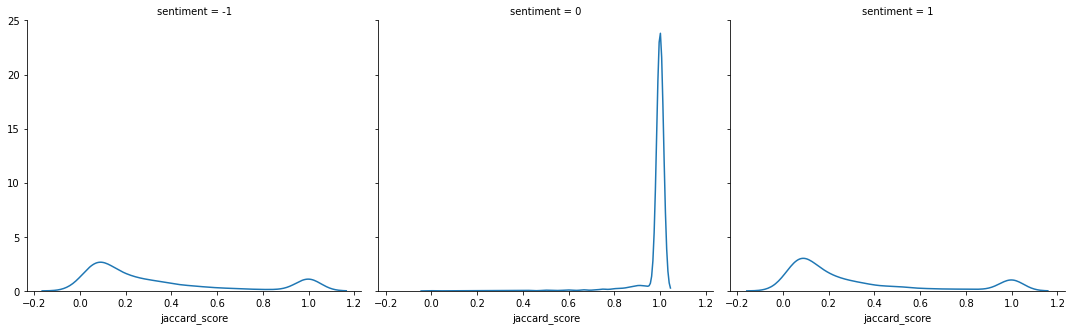

In [86]:

g=sns.FacetGrid(data=data_train,col='sentiment',height=5);
g.map(sns.kdeplot,'jaccard_score');
plt.subplots_adjust(top=0.87,)